In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read in dataset w/ scores

In [2]:
rrs_xds = xr.open_dataset('/glusteruser/awindled/ALL_NOBM_OASIM_data_2020_w_scores.nc', decode_times=False)
rrs_xds

<xarray.Dataset>
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon             (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 350 351 352 353 354 ... 747 748 749 750
    wv              (wavelength) int64 ...
Data variables: (12/55)
    tot             (months, lat, lon) float32 ...
    chl             (months, lat, lon) float32 ...
    dia             (months, lat, lon) float32 ...
    coc             (months, lat, lon) float32 ...
    cya             (months, lat, lon) float32 ...
    din             (months, lat, lon) float32 ...
    ...              ...
    PC_3            (months, lat, lon) float64 ...
    PC_4            (months, lat, lon) float64 ...
    PC_5            (months, lat, lon) float64 ...
    PC_6            (months, lat, lon) float64 ...
    PC_7            (months, lat, lon) float64 ...
    PC_8            (months, lat, lon) float64 ...

# Standardize env variables (values range from 0-1)

In [3]:
env_vars = ['pic', 'irn', 'rno', 'h', 'sil', 'dtc', 'cdc', 't', 's', 'par']

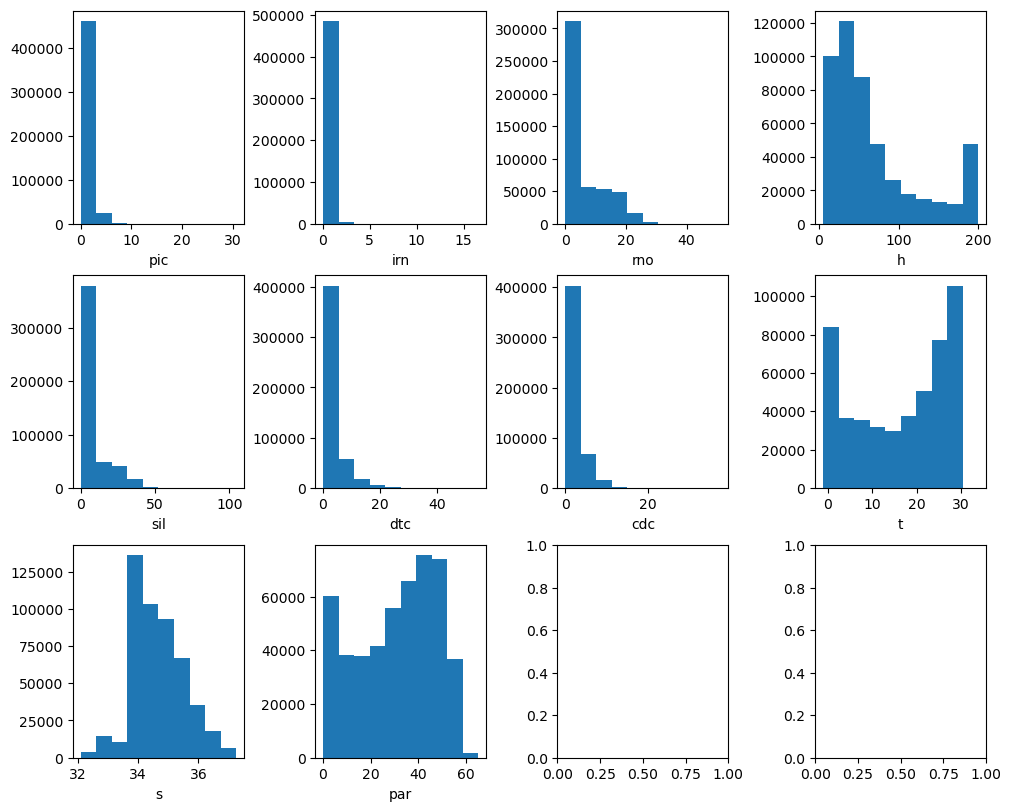

In [4]:
#histograms of unscaled env data
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,8), layout='compressed')

axs = axs.ravel()

for i in range(len(env_vars)):
    rrs_xds[env_vars[i]].plot.hist(ax=axs[i])
    axs[i].set_xlabel(env_vars[i])

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in range(len(env_vars)):
    foo = rrs_xds[env_vars[i]].values.reshape(12*234*288)
    print(foo.reshape(-1, 1).shape)
    foo = scaler.fit_transform(foo.reshape(-1, 1))
    rrs_xds[env_vars[i]].values = foo.reshape(12,234,288)
rrs_xds

(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)
(808704, 1)


<xarray.Dataset>
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon             (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 350 351 352 353 354 ... 747 748 749 750
    wv              (wavelength) int64 ...
Data variables: (12/55)
    tot             (months, lat, lon) float32 ...
    chl             (months, lat, lon) float32 ...
    dia             (months, lat, lon) float32 ...
    coc             (months, lat, lon) float32 ...
    cya             (months, lat, lon) float32 ...
    din             (months, lat, lon) float32 ...
    ...              ...
    PC_3            (months, lat, lon) float64 ...
    PC_4            (months, lat, lon) float64 ...
    PC_5            (months, lat, lon) float64 ...
    PC_6            (months, lat, lon) float64 ...
    PC_7            (months, lat, lon) float64 ...
    PC_8            (months, lat, lon) float64 ...

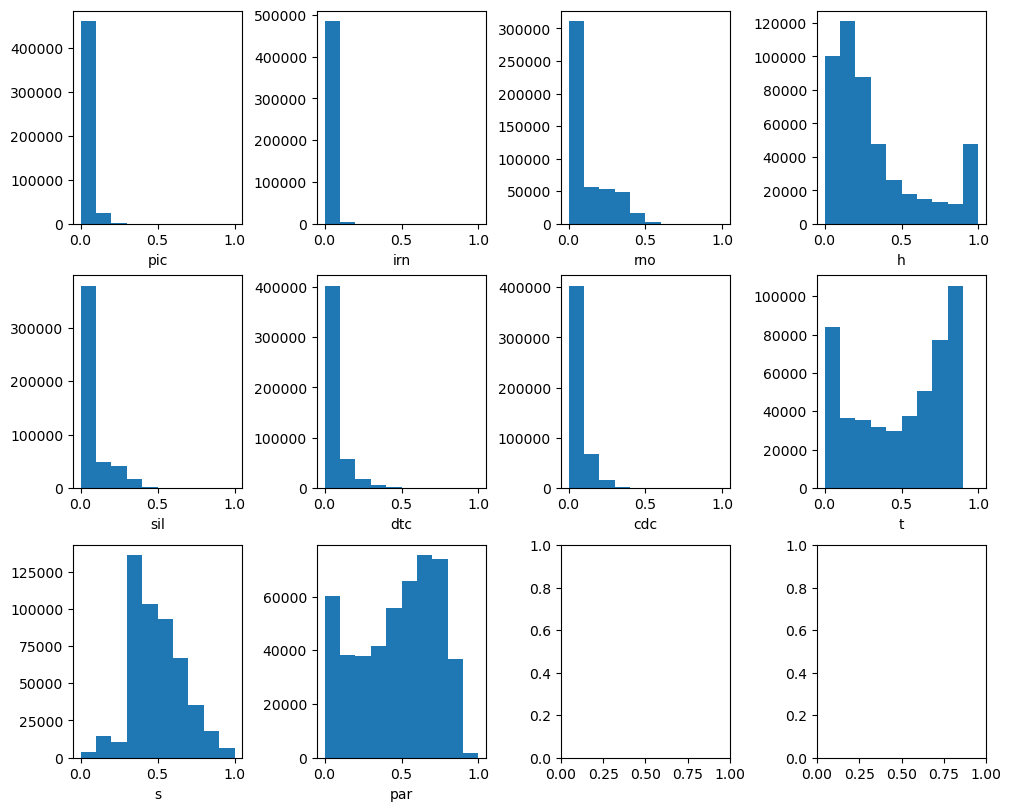

In [6]:
#histograms of scaled env data
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,8), layout='compressed')

axs = axs.ravel()

for i in range(len(env_vars)):
    rrs_xds[env_vars[i]].plot.hist(ax=axs[i])
    axs[i].set_xlabel(env_vars[i])

# Make new variables of logged phyto groups and add 2 to get rid of zeros

In [7]:
rrs_xds['log_tot'] = np.log10(rrs_xds.tot+2) 
rrs_xds['log_chl'] = np.log10(rrs_xds.chl+2)
rrs_xds['log_dia'] = np.log10(rrs_xds.dia+2) 
rrs_xds['log_coc'] = np.log10(rrs_xds.coc+2) 
rrs_xds['log_cya'] = np.log10(rrs_xds.cya+2) 
rrs_xds['log_din'] = np.log10(rrs_xds.din+2) 
rrs_xds['log_pha'] = np.log10(rrs_xds.pha+2)
rrs_xds

<xarray.Dataset>
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon             (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 350 351 352 353 354 ... 747 748 749 750
    wv              (wavelength) int64 ...
Data variables: (12/62)
    tot             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    chl             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    dia             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    coc             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    cya             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    din             (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    ...              ...
    log_chl         (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    log_dia         (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    log_coc         (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    log_cya         (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    log_din         (months, lat, lon) float32 nan nan nan nan ... nan nan nan
    log_pha         (months, lat, lon) float32 nan nan nan nan ... nan nan nan

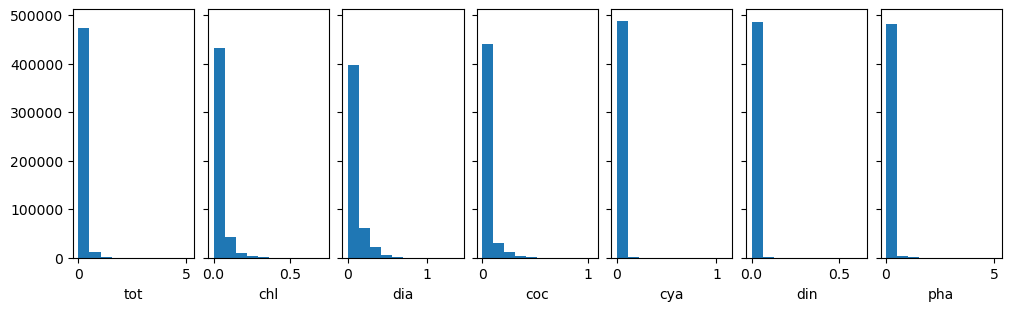

<Figure size 640x480 with 0 Axes>

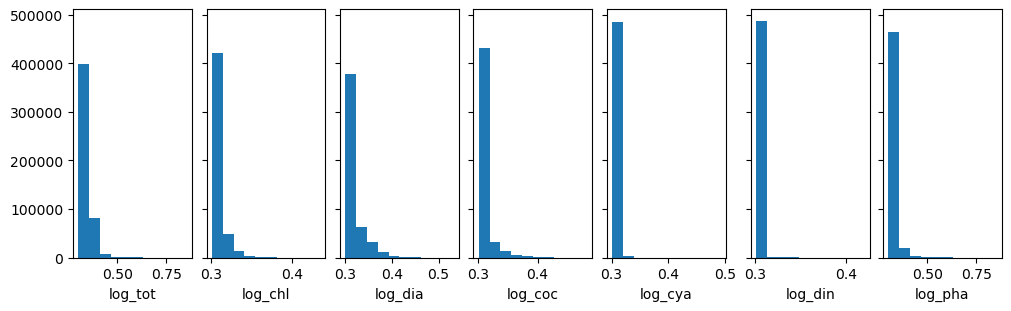

In [8]:
phyto_vars = ['tot', 'chl', 'dia', 'coc', 'cya', 'din', 'pha']
log_phyto_vars = ['log_tot', 'log_chl', 'log_dia', 'log_coc', 'log_cya', 'log_din', 'log_pha']

#histograms of phyto groups
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(10,3), sharey=True, layout='compressed')

axs = axs.ravel()

for i in range(len(phyto_vars)):
    rrs_xds[phyto_vars[i]].plot.hist(ax=axs[i])
    axs[i].set_xlabel(phyto_vars[i])

plt.figure(2)
#histograms of logged phyto groups
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(10,3), sharey=True, layout='compressed')

axs = axs.ravel()

for i in range(len(log_phyto_vars)):
    rrs_xds[log_phyto_vars[i]].plot.hist(ax=axs[i])
    axs[i].set_xlabel(log_phyto_vars[i])

# Convert data into pandas dataframe

In [9]:
variables = list(rrs_xds.keys())[0:18]
variables.extend(['aph440_aph676', 'aph440_ap440', 'a_cdoc_443', 'bbp_s_440_555'])
variables.extend(list(rrs_xds.keys())[47:62])
variables.remove("ice")
variables

['tot',
 'chl',
 'dia',
 'coc',
 'cya',
 'din',
 'pha',
 'pic',
 'irn',
 'rno',
 'h',
 'sil',
 'dtc',
 'cdc',
 't',
 's',
 'par',
 'aph440_aph676',
 'aph440_ap440',
 'a_cdoc_443',
 'bbp_s_440_555',
 'PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'PC_7',
 'PC_8',
 'log_tot',
 'log_chl',
 'log_dia',
 'log_coc',
 'log_cya',
 'log_din',
 'log_pha']

In [23]:
rrs_xds_dat = rrs_xds[variables].to_dataframe()
rrs_xds_dat

tot  chl  dia  coc  cya  din  pha  pic  irn  rno  \
months lat        lon                                                         
0.0    -84.000000 -180.00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                  -178.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                  -177.50  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                  -176.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                  -175.00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11.0    71.333336  173.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                   175.00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                   176.25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                   177.50  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                   178.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                           ...  PC_6  PC_7  PC_8  log_tot  log_chl  log_dia  \
months lat        lon      ...                                                
0.0    -84.000000 -180.00  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                  -178.75  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                  -177.50  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                  -176.25  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                  -175.00  ...   0.0   0.0   0.0      NaN      NaN      NaN   
...                        ...   ...   ...   ...      ...      ...      ...   
11.0    71.333336  173.75  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                   175.00  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                   176.25  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                   177.50  ...   0.0   0.0   0.0      NaN      NaN      NaN   
                   178.75  ...   0.0   0.0   0.0      NaN      NaN      NaN   

                           log_coc  log_cya  log_din  log_pha  
months lat        lon                                          
0.0    -84.000000 -180.00      NaN      NaN      NaN      NaN  
                  -178.75      NaN      NaN      NaN      NaN  
                  -177.50      NaN      NaN      NaN      NaN  
                  -176.25      NaN      NaN      NaN      NaN  
                  -175.00      NaN      NaN      NaN      NaN  
...                            ...      ...      ...      ...  
11.0    71.333336  173.75      NaN      NaN      NaN      NaN  
                   175.00      NaN      NaN      NaN      NaN  
                   176.25      NaN      NaN      NaN      NaN  
                   177.50      NaN      NaN      NaN      NaN  
                   178.75      NaN      NaN      NaN      NaN  

[808704 rows x 36 columns]

# Correlation plot of phyto groups and env data/ PC scores

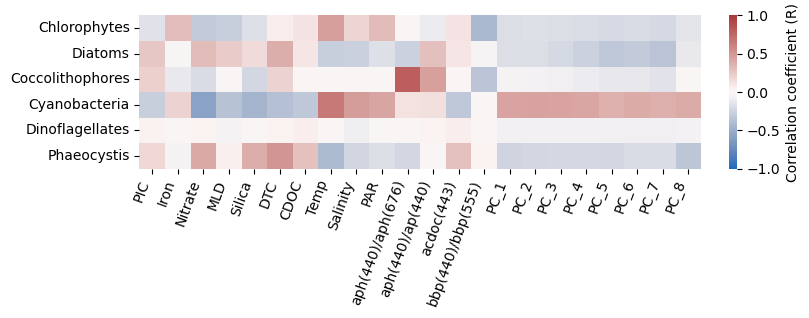

In [11]:
fig, axs = plt.subplots(figsize=(8,8), sharey=True, layout='compressed')

env_vars = list(rrs_xds.keys())[7:18]
env_vars.extend(['aph440_aph676', 'aph440_ap440', 'a_cdoc_443', 'bbp_s_440_555'])
env_vars.remove('ice')
env_vars.extend(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8'])

sns.heatmap(rrs_xds_dat.corr().loc[phyto_vars[1:], env_vars], annot=False, vmin=-1, vmax=1,
            cmap='vlag', square=True, cbar_kws={'label': 'Correlation coefficient (R)'})

axs.set_yticklabels(['Chlorophytes', 'Diatoms', 'Coccolithophores', 'Cyanobacteria', 
                     'Dinoflagellates', 'Phaeocystis'], rotation=0)

axs.set_xticklabels(['PIC', 'Iron', 'Nitrate', 'MLD', 'Silica', 'DTC', 'CDOC', 'Temp', 
                     'Salinity', 'PAR', 'aph(440)/aph(676)', 'aph(440)/ap(440)', 
                     'acdoc(443)', 'bbp(440)/bbp(555)', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 
                     'PC_5', 'PC_6', 'PC_7', 'PC_8'], rotation=70, ha='right')

plt.show()

In [24]:
#drop nans for SequentialFeatureSelector function
rrs_xds_dat = rrs_xds_dat.dropna()
rrs_xds_dat

tot           chl           dia           coc  \
months lat        lon                                                           
0.0    -78.000000 -180.00  0.435280  1.302277e-32  5.790093e-08  1.836052e-12   
                  -178.75  0.442183  1.800597e-32  9.011884e-08  3.257872e-12   
                  -177.50  0.481909  2.523838e-32  1.144635e-07  3.826336e-12   
                  -176.25  0.488594  3.730429e-32  1.733026e-07  5.143830e-12   
                  -175.00  0.497206  6.912371e-32  2.431619e-07  7.160853e-12   
...                             ...           ...           ...           ...   
11.0    70.666664  11.25   0.012477  3.297888e-26  9.077619e-03  3.398656e-03   
                   12.50   0.012505  3.692610e-27  9.195263e-03  3.309032e-03   
                   13.75   0.012494  4.220176e-28  9.203578e-03  3.290530e-03   
                   15.00   0.012181  6.779949e-29  9.030103e-03  3.151193e-03   
                   16.25   0.012571  1.280946e-29  9.533199e-03  3.037988e-03   

                                    cya           din           pha       pic  \
months lat        lon                                                           
0.0    -78.000000 -180.00  6.897307e-27  2.209340e-32  4.352803e-01  0.087553   
                  -178.75  1.139934e-26  3.322602e-32  4.421830e-01  0.084408   
                  -177.50  2.645717e-26  3.457083e-32  4.819090e-01  0.082188   
                  -176.25  3.336013e-26  4.394092e-32  4.885941e-01  0.037648   
                  -175.00  6.450341e-26  5.779970e-32  4.972054e-01  0.037325   
...                                 ...           ...           ...       ...   
11.0    70.666664  11.25   2.053559e-32  6.851186e-07  1.198069e-16  0.034525   
                   12.50   2.029524e-32  4.639312e-07  8.584605e-18  0.033835   
                   13.75   2.029467e-32  2.601123e-07  4.475222e-19  0.033764   
                   15.00   2.029227e-32  1.060638e-07  2.997065e-20  0.032094   
                   16.25   2.034517e-32  4.291214e-08  2.179896e-21  0.029447   

                                irn       rno  ...      PC_6      PC_7  \
months lat        lon                          ...                       
0.0    -78.000000 -180.00  0.007332  0.201124  ... -0.797977  0.903110   
                  -178.75  0.006864  0.196557  ... -0.857627  0.840572   
                  -177.50  0.007734  0.213100  ... -0.917560  0.777221   
                  -176.25  0.007556  0.221613  ... -1.186494  0.515267   
                  -175.00  0.007825  0.228030  ... -1.191440  0.510048   
...                             ...       ...  ...       ...       ...   
11.0    70.666664  11.25   0.023712  0.263522  ... -0.968971  0.768001   
                   12.50   0.022787  0.258618  ... -0.969846  0.767691   
                   13.75   0.022105  0.255697  ... -0.970073  0.767192   
                   15.00   0.024089  0.287036  ... -0.971338  0.765944   
                   16.25   0.019779  0.243204  ... -0.973915  0.765234   

                               PC_8   log_tot  log_chl   log_dia   log_coc  \
months lat        lon                                                        
0.0    -78.000000 -180.00 -0.304623  0.386549  0.30103  0.301030  0.301030   
                  -178.75 -0.325603  0.387778  0.30103  0.301030  0.301030   
                  -177.50 -0.346979  0.394786  0.30103  0.301030  0.301030   
                  -176.25 -0.428469  0.395954  0.30103  0.301030  0.301030   
                  -175.00 -0.429928  0.397454  0.30103  0.301030  0.301030   
...                             ...       ...      ...       ...       ...   
11.0    70.666664  11.25  -0.338577  0.303731  0.30103  0.302997  0.301767   
                   12.50  -0.339083  0.303737  0.30103  0.303022  0.301748   
                   13.75  -0.338676  0.303735  0.30103  0.303024  0.301744   
                   15.00  -0.338541  0.303667  0.30103  0.302986  0.301714   
                   16.25 

# remove rows where phyto group conc is < 0.001

In [25]:
rrs_xds_dat = rrs_xds_dat[((rrs_xds_dat.dia >= 0.0001) 
                   & (rrs_xds_dat.din >= 0.0001) 
                   & (rrs_xds_dat.cya >= 0.0001) 
                   & (rrs_xds_dat.chl >= 0.0001) 
                   & (rrs_xds_dat.coc >= 0.0001))]
rrs_xds_dat

tot       chl       dia       coc       cya  \
months lat        lon                                                        
0.0    -22.000000  1.25   0.047784  0.000354  0.000577  0.027291  0.019426   
                   2.50   0.060383  0.000270  0.001152  0.045396  0.013270   
       -21.333334  1.25   0.049519  0.001450  0.000630  0.029736  0.017456   
                   2.50   0.054740  0.000773  0.001195  0.044579  0.007692   
                   5.00   0.149443  0.000109  0.009430  0.135691  0.000429   
...                            ...       ...       ...       ...       ...   
11.0    45.333332 -27.50  0.262440  0.013866  0.174696  0.071744  0.001338   
                  -26.25  0.246722  0.006698  0.171140  0.066484  0.001940   
                  -25.00  0.244650  0.004740  0.194531  0.044180  0.000855   
                  -23.75  0.237303  0.003520  0.197153  0.035932  0.000447   
                  -22.50  0.233623  0.001973  0.205083  0.026230  0.000185   

                               din           pha       pic       irn  \
months lat        lon                                                  
0.0    -22.000000  1.25   0.000136  9.107642e-22  0.023503  0.012292   
                   2.50   0.000294  1.546095e-22  0.018583  0.011728   
       -21.333334  1.25   0.000247  6.383139e-21  0.013700  0.011332   
                   2.50   0.000501  9.127014e-22  0.014057  0.010631   
                   5.00   0.003783  2.153579e-24  0.051518  0.009118   
...                            ...           ...       ...       ...   
11.0    45.333332 -27.50  0.000796  3.803802e-12  0.034444  0.014908   
                  -26.25  0.000460  3.517677e-12  0.041339  0.017171   
                  -25.00  0.000344  3.040807e-12  0.029487  0.018846   
                  -23.75  0.000252  1.708355e-12  0.017270  0.018871   
                  -22.50  0.000151  8.075570e-13  0.012239  0.019339   

                               rno  ...      PC_6      PC_7      PC_8  \
months lat        lon               ...                                 
0.0    -22.000000  1.25   0.000378  ... -0.589845  1.162279 -0.152356   
                   2.50   0.000655  ... -0.665534  1.086679 -0.180187   
       -21.333334  1.25   0.000409  ... -0.611592  1.144818 -0.155930   
                   2.50   0.000773  ... -0.667410  1.090231 -0.181347   
                   5.00   0.009191  ... -0.808287  0.917806 -0.236374   
...                            ...  ...       ...       ...       ...   
11.0    45.333332 -27.50  0.056817  ... -0.689198  1.027964 -0.129477   
                  -26.25  0.075876  ... -0.681670  1.035937 -0.132364   
                  -25.00  0.093199  ... -0.699658  1.021167 -0.137548   
                  -23.75  0.089825  ... -0.715953  1.010046 -0.142629   
                  -22.50  0.088549  ... -0.721705  1.006800 -0.144763   

                           log_tot   log_chl   log_dia   log_coc   log_cya  \
months lat        lon                                                        
0.0    -22.000000  1.25   0.311284  0.301107  0.301155  0.306916  0.305228   
                   2.50   0.313948  0.301089  0.301280  0.310777  0.303902   
       -21.333334  1.25   0.311652  0.301345  0.301167  0.307440  0.304804   
                   2.50   0.312757  0.301198  0.301289  0.310604  0.302697   
                   5.00   0.332326  0.301054  0.303073  0.329538  0.301123   
...                            ...       ...       ...       ...       ...   
11.0    45.333332 -27.50  0.354577  0.304031  0.337399  0.316336  0.301320   
                  -26.25  0.351549  0.302482  0.336688  0.315232  0.301451   
                  -25.00  0.351149  0.302058  0.341342  0.310519  0.301216   
                  -23.75  0.349725  0.301794  0.341860  0.308763  0.301127   
                  -22.50  0.349010  0.301458  0.343425  0.306689  0.301070   

                           log_din  log_pha  
months lat        lon                        
0.0    -22.000000  1.2

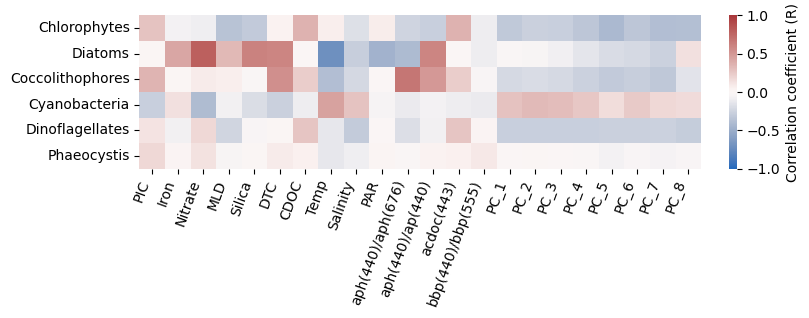

In [26]:
fig, axs = plt.subplots(figsize=(8,8), sharey=True, layout='compressed')

env_vars = list(rrs_xds.keys())[7:18]
env_vars.extend(['aph440_aph676', 'aph440_ap440', 'a_cdoc_443', 'bbp_s_440_555'])
env_vars.remove('ice')
env_vars.extend(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8'])

sns.heatmap(rrs_xds_dat.corr().loc[phyto_vars[1:], env_vars], annot=False, vmin=-1, vmax=1,
            cmap='vlag', square=True, cbar_kws={'label': 'Correlation coefficient (R)'})

axs.set_yticklabels(['Chlorophytes', 'Diatoms', 'Coccolithophores', 'Cyanobacteria', 
                     'Dinoflagellates', 'Phaeocystis'], rotation=0)

axs.set_xticklabels(['PIC', 'Iron', 'Nitrate', 'MLD', 'Silica', 'DTC', 'CDOC', 'Temp', 
                     'Salinity', 'PAR', 'aph(440)/aph(676)', 'aph(440)/ap(440)', 
                     'acdoc(443)', 'bbp(440)/bbp(555)', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 
                     'PC_5', 'PC_6', 'PC_7', 'PC_8'], rotation=70, ha='right')

plt.show()

In [27]:
#select columns that are x variables (all columns except phyto groups)
rrs_xds_dat_x = rrs_xds_dat.iloc[:,7:29]
rrs_xds_dat_x

pic       irn       rno         h       sil  \
months lat        lon                                                        
0.0    -22.000000  1.25   0.023503  0.012292  0.000378  0.216485  0.006012   
                   2.50   0.018583  0.011728  0.000655  0.227517  0.003860   
       -21.333334  1.25   0.013700  0.011332  0.000409  0.220413  0.005364   
                   2.50   0.014057  0.010631  0.000773  0.230558  0.003135   
                   5.00   0.051518  0.009118  0.009191  0.214936  0.001739   
...                            ...       ...       ...       ...       ...   
11.0    45.333332 -27.50  0.034444  0.014908  0.056817  0.491128  0.030625   
                  -26.25  0.041339  0.017171  0.075876  0.470364  0.041778   
                  -25.00  0.029487  0.018846  0.093199  0.515354  0.044148   
                  -23.75  0.017270  0.018871  0.089825  0.548119  0.041266   
                  -22.50  0.012239  0.019339  0.088549  0.559379  0.035591   

                               dtc       cdc         t         s       par  \
months lat        lon                                                        
0.0    -22.000000  1.25   0.030247  0.039105  0.651071  0.690178  0.845504   
                   2.50   0.040518  0.047191  0.646511  0.672617  0.827764   
       -21.333334  1.25   0.031777  0.040057  0.652164  0.690029  0.806686   
                   2.50   0.041310  0.046498  0.647665  0.671025  0.824082   
                   5.00   0.088760  0.071171  0.639716  0.630797  0.844916   
...                            ...       ...       ...       ...       ...   
11.0    45.333332 -27.50  0.070234  0.037921  0.456207  0.636409  0.102467   
                  -26.25  0.068457  0.038941  0.456005  0.642233  0.096512   
                  -25.00  0.069860  0.039842  0.452368  0.642144  0.093046   
                  -23.75  0.070507  0.040820  0.448050  0.640894  0.097998   
                  -22.50  0.070747  0.041046  0.444861  0.641985  0.104587   

                          ...  a_cdoc_443  bbp_s_440_555      PC_1      PC_2  \
months lat        lon     ...                                                  
0.0    -22.000000  1.25   ...    0.005249       1.389762  1.462420 -0.083068   
                   2.50   ...    0.006334       1.282386  1.421840 -0.133815   
       -21.333334  1.25   ...    0.005376       1.294296  1.447464 -0.101669   
                   2.50   ...    0.006241       1.247014  1.410696 -0.146028   
                   5.00   ...    0.009553       1.273271  1.357353 -0.209522   
...                       ...         ...            ...       ...       ...   
11.0    45.333332 -27.50  ...    0.005090       1.261619  1.472988 -0.087303   
                  -26.25  ...    0.005227       1.301214  1.475890 -0.082458   
                  -25.00  ...    0.005348       1.287672  1.462919 -0.099186   
                  -23.75  ...    0.005479       1.234241  1.449183 -0.117261   
                  -22.50  ...    0.005509       1.214421  1.444312 -0.122899   

                              PC_3      PC_4      PC_5      PC_6      PC_7  \
months lat        lon                                                        
0.0    -22.000000  1.25  -0.764721 -0.244506  1.810356 -0.589845  1.162279   
                   2.50  -0.823910 -0.308262  1.748420 -0.665534  1.086679   
       -21.333334  1.25  -0.785237 -0.264162  1.797618 -0.611592  1.144818   
                   2.50  -0.834279 -0.313725  1.753009 -0.667410  1.090231   
                   5.00  -0.915788 -0.421866  1.603982 -0.808287  0.917806   
...                            ...       ...       ...       ...       ...   
11.0    45.333332 -27.50 -0.790309 -0.297229  1.724062 -0.689198  1.027964   
                  -26.25 -0.784284 -0.290989  1.728027 -0.681670  1.035937   
                  -25.00 -0.802314 -0.307676  1.717580 -0.699658  1.021167   
                  -23.75 -0.820947 -0.323125  1.709218 -0.715953  1.010046   
                  -22.50

# Split data into 80% train, 20% test

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rrs_xds_dat_x, rrs_xds_dat.log_dia, 
                                                    test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3154, 22)
(789, 22)
(3154,)
(789,)


# Figure out most important variables for MLR 

In [29]:
%%time 

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
                                n_features_to_select='auto',
                                direction='backward', scoring = 'r2', 
                                n_jobs=40, cv=5) 

selected_features = sfs.fit(x_train, y_train)
selected_features

CPU times: user 2.11 s, sys: 199 ms, total: 2.31 s
Wall time: 3.2 s


SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_jobs=40, scoring='r2')

In [30]:
selected_features = x_train.loc[:, selected_features.support_].columns
selected_features

Index(['pic', 'rno', 'dtc', 's', 'aph440_aph676', 'bbp_s_440_555', 'PC_1',
       'PC_4', 'PC_5', 'PC_7', 'PC_8'],
      dtype='object')

# 100 fold Cross validation

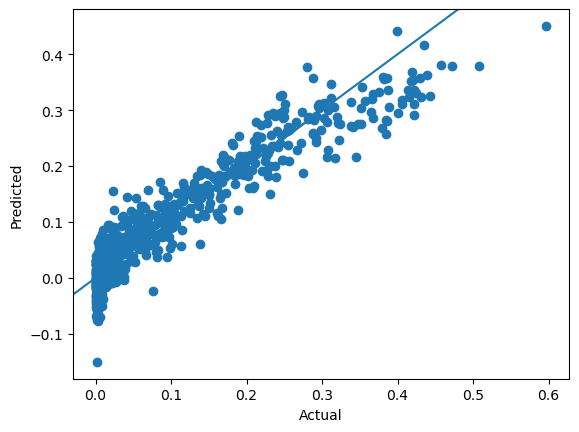

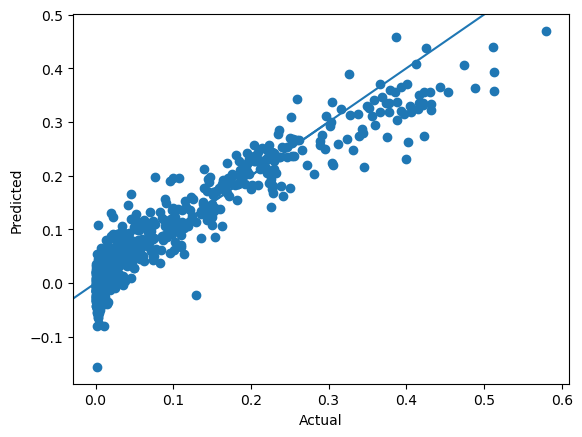

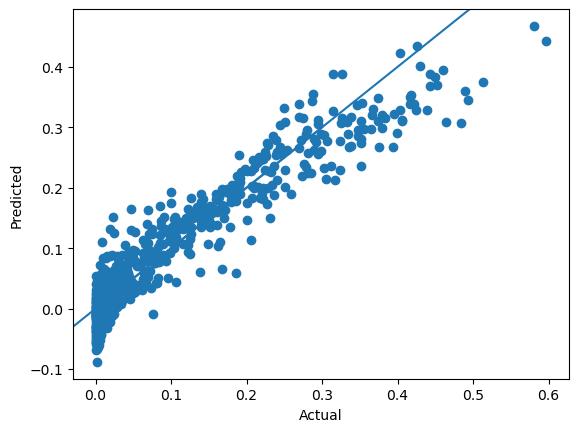

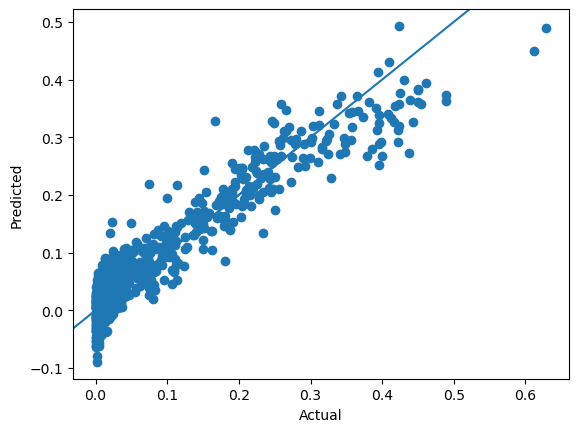

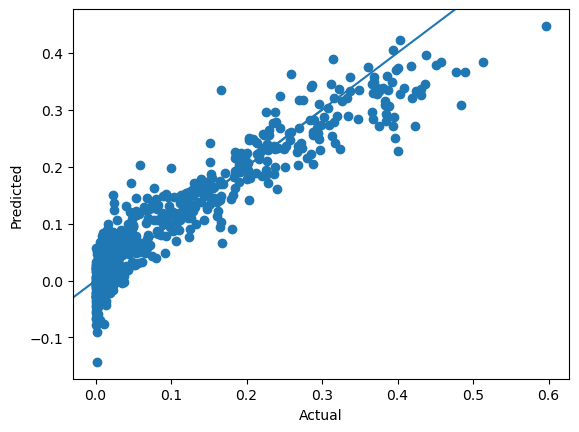

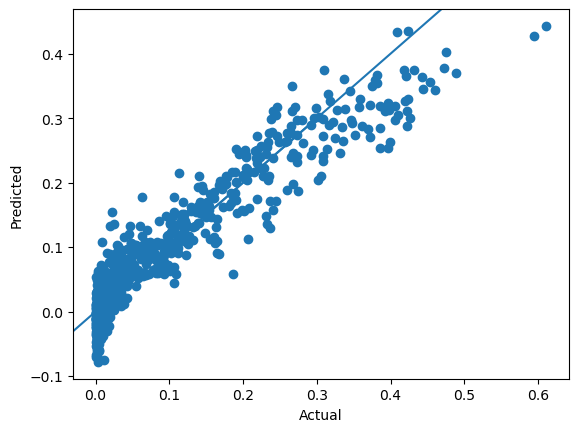

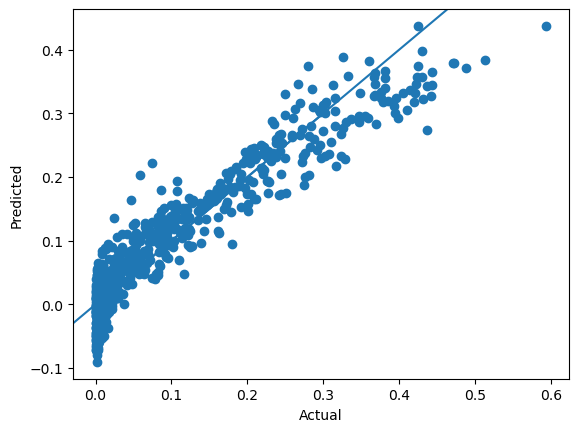

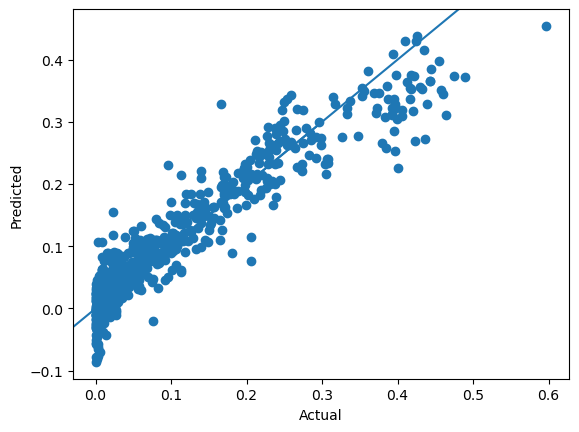

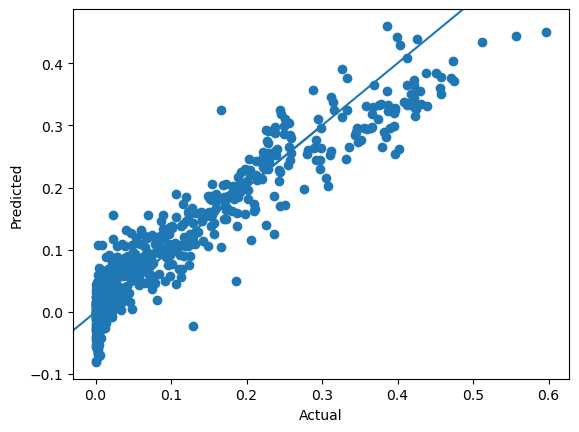

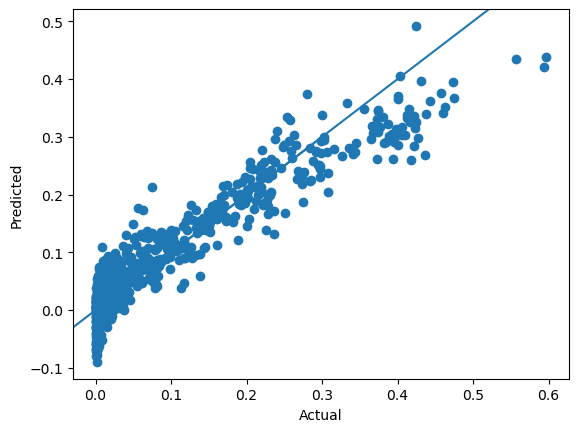

In [31]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

coefs_all = []
intercept_all = []

r2_scores = []
bias_scores = []
mae_scores = []
kf = ShuffleSplit(n_splits=10, test_size=0.2)

for train_index, test_index in kf.split(rrs_xds_dat_x):

   # Split the data into training and test sets
    x_train, x_test = rrs_xds_dat_x.iloc[train_index], rrs_xds_dat_x.iloc[test_index]
    y_train, y_test = rrs_xds_dat.log_dia.iloc[train_index], rrs_xds_dat.log_dia.iloc[test_index]

    x_train_selected = x_train.loc[:, selected_features]
    
    linreg=linear_model.LinearRegression()
    linreg.fit(x_train_selected, y_train)
    y_pred = linreg.predict(x_test.loc[:, selected_features])

    fig, ax = plt.subplots()
    scatter = ax.scatter((10** y_test) -2, (10** y_pred) -2)
    ax.plot([0,0.3],[0,0.3] )
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.axline((0, 0), slope=1)

    coefs = linreg.coef_
    intercept = linreg.intercept_

    r2score = r2_score(y_test, y_pred)
    bias = np.nansum((y_pred - y_test))/len(y_test)
    mae = np.nansum(np.abs((y_pred - y_test)))/len(y_test)

    coefs_all.append(coefs)
    intercept_all.append(intercept)
    
    # Append the score to the list of cross-validation scores
    r2_scores.append(r2score)
    bias_scores.append(bias)
    mae_scores.append(mae)


In [32]:
coefs_all_mn = np.mean(coefs_all, axis=0)
print(coefs_all_mn)
print(np.mean(intercept_all))
print('')
print(np.mean(r2_scores))
print(np.mean(bias_scores))
print(np.mean(mae_scores))

[ 0.13178385  0.11666165  0.05291815  0.01155264 -0.01078126  0.06518579
 -2.87262885  4.43077691  5.15334326 -5.85023847 -1.5726493 ]
2.7360252411786687

0.895578847019056
-8.568554572946684e-05
0.005728973589714987


In [33]:
#%%time 

dia_all = []
for i in range(len(rrs_xds_dat)):
    ugh_all = []
    for j in range(len(coefs_all_mn)):
        ugh = coefs_all_mn[j] * rrs_xds_dat[selected_features].iloc[i,j]
        ugh_all.append(ugh)
    dia = np.mean(intercept_all) + np.nansum(ugh_all)
    dia_all.append(dia)
    
print(len(dia_all))

3943


0.8945808550609973


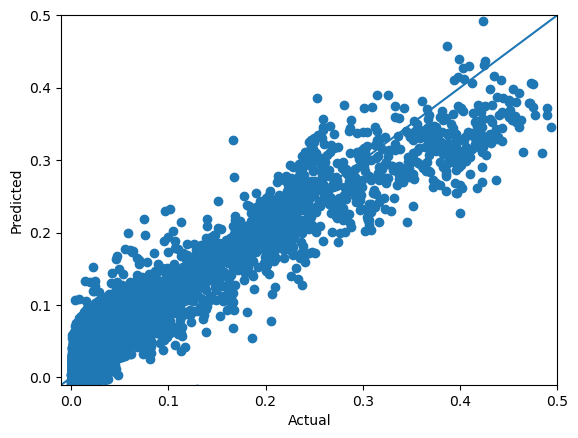

In [41]:
fig, ax = plt.subplots()

scatter = ax.scatter((10** rrs_xds_dat.log_dia) -2, (10** np.array(dia_all)) -2)

ax.set_xlim([-0.01, .5])
ax.set_ylim([-0.01, 0.5])
ax.axline((0, 0), slope=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

score = r2_score(rrs_xds_dat.log_dia, np.array(dia_all))
print(score)